In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "../data/raw/ff192bootstrapping_mutspecs/bootstrapping_mutspecs"

In [3]:
filepaths = sorted(os.listdir(path))
filepaths[:3]

['FF_MutSpec_192comp_1.csv',
 'FF_MutSpec_192comp_10.csv',
 'FF_MutSpec_192comp_100.csv']

In [4]:
dataframes = []
for f in filepaths:
    if f.endswith(".csv"):
        _path = os.path.join(path, f)
        _df = pd.read_csv(_path, index_col=0)
        dataframes.append(_df)

In [5]:
d = dataframes[0]
d["NucSubst"] = d["NucSubst"].str.replace("U", "T")
d["Context"] = d.NucSubst.str.slice(0, 3)
d["Mut"] = d.NucSubst.str.get(1) + ">" + d.NucSubst.str.get(-2)

In [6]:
d

,NucSubst,ObsFr,ExpFr,ObsToExp,MutSpec,Context,Mut
1,AAA>ACA,NaN,NaN,0.000000,0.000000,AAA,A>C
2,AAA>AGA,NaN,NaN,0.000000,0.000000,AAA,A>G
3,AAA>ATA,NaN,NaN,0.000000,0.000000,AAA,A>T
4,AAC>ACC,NaN,NaN,0.000000,0.000000,AAC,A>C
5,AAC>AGC,NaN,NaN,0.000000,0.000000,AAC,A>G
...,...,...,...,...,...,...,...
188,TTG>TCG,6408.0,225.0,28.480000,0.005301,TTG,T>C
189,TTG>TGG,2493.0,225.0,11.080000,0.002062,TTG,T>G
190,TTT>TAT,183.0,151.0,1.211921,0.000226,TTT,T>A
191,TTT>TCT,7602.0,151.0,50.344371,0.009370,TTT,T>C


In [7]:
d[d.NucSubst.str.startswith("A")]

,NucSubst,ObsFr,ExpFr,ObsToExp,MutSpec,Context,Mut
1,AAA>ACA,NaN,NaN,0.0,0.0,AAA,A>C
2,AAA>AGA,NaN,NaN,0.0,0.0,AAA,A>G
3,AAA>ATA,NaN,NaN,0.0,0.0,AAA,A>T
4,AAC>ACC,NaN,NaN,0.0,0.0,AAC,A>C
5,AAC>AGC,NaN,NaN,0.0,0.0,AAC,A>G
6,AAC>ATC,NaN,NaN,0.0,0.0,AAC,A>T
7,AAG>ACG,NaN,NaN,0.0,0.0,AAG,A>C
8,AAG>AGG,NaN,NaN,0.0,0.0,AAG,A>G
9,AAG>ATG,NaN,NaN,0.0,0.0,AAG,A>T
10,AAT>ACT,NaN,NaN,0.0,0.0,AAT,A>C


In [8]:
gr = d.groupby("Mut")
gr.get_group("A>C")

,NucSubst,ObsFr,ExpFr,ObsToExp,MutSpec,Context,Mut
1,AAA>ACA,NaN,NaN,0.000000,0.000000,AAA,A>C
4,AAC>ACC,NaN,NaN,0.000000,0.000000,AAC,A>C
7,AAG>ACG,NaN,NaN,0.000000,0.000000,AAG,A>C
10,AAT>ACT,NaN,NaN,0.000000,0.000000,AAT,A>C
49,CAA>CCA,758.0,213.0,3.558685,0.000662,CAA,A>C
52,CAC>CCC,284.0,206.0,1.378641,0.000257,CAC,A>C
55,CAG>CCG,588.0,230.0,2.556522,0.000476,CAG,A>C
58,CAT>CCT,1024.0,166.0,6.168675,0.001148,CAT,A>C
97,GAA>GCA,470.0,41.0,11.463415,0.002134,GAA,A>C
100,GAC>GCC,127.0,37.0,3.432432,0.000639,GAC,A>C


In [9]:
gr.get_group("C>G")

,NucSubst,ObsFr,ExpFr,ObsToExp,MutSpec,Context,Mut
14,ACA>AGA,NaN,NaN,0.000000,0.000000,ACA,C>G
17,ACC>AGC,NaN,NaN,0.000000,0.000000,ACC,C>G
20,ACG>AGG,NaN,NaN,0.000000,0.000000,ACG,C>G
23,ACT>AGT,NaN,NaN,0.000000,0.000000,ACT,C>G
62,CCA>CGA,236.0,111.0,2.126126,0.000396,CCA,C>G
65,CCC>CGC,167.0,28.0,5.964286,0.001110,CCC,C>G
68,CCG>CGG,41.0,27.0,1.518519,0.000283,CCG,C>G
71,CCT>CGT,368.0,77.0,4.779221,0.000889,CCT,C>G
110,GCA>GGA,4.0,63.0,0.063492,0.000012,GCA,C>G
113,GCC>GGC,23.0,15.0,1.533333,0.000285,GCC,C>G


In [11]:
full_df = pd.concat(dataframes, ignore_index=True)
full_df

,NucSubst,ObsFr,ExpFr,ObsToExp,MutSpec,Context,Mut
0,AAA>ACA,NaN,NaN,0.000000,0.000000,AAA,A>C
1,AAA>AGA,NaN,NaN,0.000000,0.000000,AAA,A>G
2,AAA>ATA,NaN,NaN,0.000000,0.000000,AAA,A>T
3,AAC>ACC,NaN,NaN,0.000000,0.000000,AAC,A>C
4,AAC>AGC,NaN,NaN,0.000000,0.000000,AAC,A>G
...,...,...,...,...,...,...,...
191995,UUG>UCG,6359.0,225.0,28.262222,0.005250,NaN,NaN
191996,UUG>UGG,2557.0,225.0,11.364444,0.002111,NaN,NaN
191997,UUU>UAU,168.0,151.0,1.112583,0.000207,NaN,NaN
191998,UUU>UCU,7779.0,151.0,51.516556,0.009570,NaN,NaN


In [12]:
full_df.groupby("NucSubst").ObsFr.describe()

,count,mean,std,min,25%,50%,75%,max
NucSubst,,,,,,,,
AAA>ACA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAA>AGA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAA>ATA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAA>AUA,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AAC>ACC,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
UUG>UCG,999.0,6379.581582,75.175860,6125.0,6327.5,6380.0,6428.0,6585.0
UUG>UGG,999.0,2491.766767,49.272225,2323.0,2459.0,2493.0,2525.0,2643.0
UUU>UAU,999.0,162.455455,13.177977,122.0,153.0,163.0,171.0,204.0


<AxesSubplot:xlabel='NucSubst', ylabel='MutSpec'>

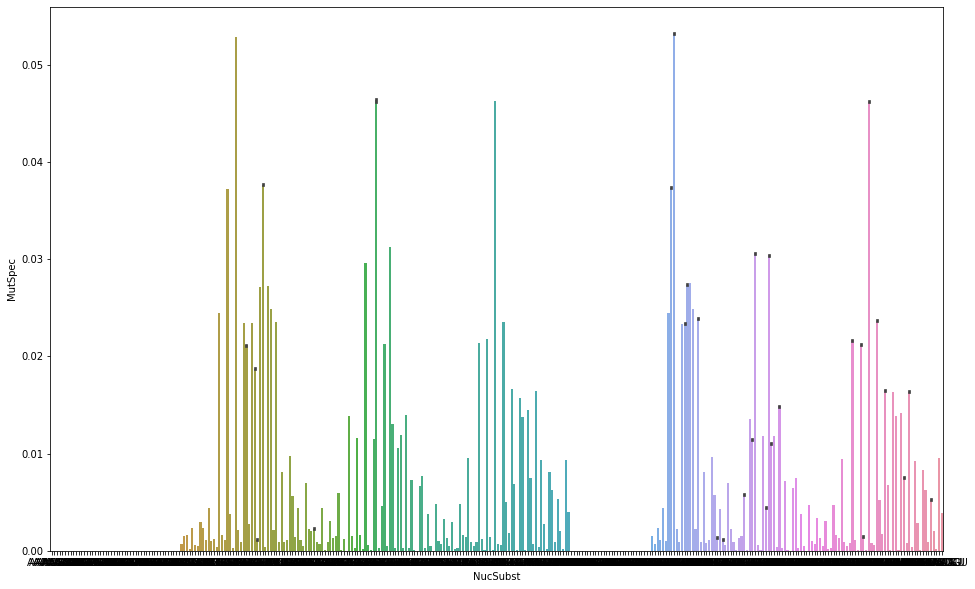

In [14]:
plt.figure(figsize=(16, 10))
sns.barplot(x="NucSubst", y="MutSpec", data=full_df, ci=95);

In [34]:
base_path = "https://cog.sanger.ac.uk/cosmic-signatures-production/documents/COSMIC_v{}_SBS_{}.txt"
genomes = ["GRCh37", "GRCh38", "mm9", "mm10"]
version = "3"

cosmic = []
for g in genomes:
    _df = pd.read_csv(base_path.format(version, g), sep="\t")
    cols = _df.columns
    new_cols = []
    for c in cols:
        if c.startswith("SBS"):
            c = c + "_" + g
        new_cols.append(c)
    _df.columns = new_cols
    cosmic.append(_df)

In [35]:
from functools import partial, reduce

sbs = reduce(partial(pd.merge, on="Type"), cosmic)

In [36]:
sbs[["Type"] + [c for c in sbs.columns if "18" in c]]

,Type,SBS18_GRCh37,SBS18_GRCh38,SBS18_mm9,SBS18_mm10
0,A[C>A]A,0.051534,0.051688,0.058210,0.058209
1,A[C>A]C,0.015810,0.015617,0.016001,0.016001
2,A[C>A]G,0.002432,0.002505,0.002200,0.002200
3,A[C>A]T,0.021414,0.021469,0.021509,0.021510
4,A[C>G]A,0.001731,0.001736,0.001955,0.001955
...,...,...,...,...,...
91,T[T>C]T,0.003372,0.003377,0.002886,0.002886
92,T[T>G]A,0.000696,0.000686,0.000624,0.000624
93,T[T>G]C,0.002101,0.002136,0.002156,0.002157
94,T[T>G]G,0.001451,0.001458,0.001423,0.001423


In [38]:
_path = "https://raw.githubusercontent.com/tomsasani/bxd_mutator_manuscript/471c88d47e2677b3cb22dac142afd52ea6edb81b/data/sigProfiler_SBS_signatures_SBS18.csv"
their_sbs = pd.read_csv(_path)
their_sbs.head()

,Type,Subtype,SBS18_GRCh37,SBS18_GRCh38,SBS18_mm9,SBS18_mm10
0,C>A,ACA,0.051534,0.051381,0.045303,0.045188
1,C>A,ACC,0.015810,0.016005,0.015500,0.015478
2,C>A,ACG,0.002432,0.002361,0.002663,0.002682
3,C>A,ACT,0.021414,0.021356,0.021160,0.021113
4,C>G,ACA,0.001731,0.001726,0.001522,0.001518


In [47]:
tcols = "SBS18_GRCh37	SBS18_GRCh38	SBS18_mm9	SBS18_mm10".split()
(their_sbs[tcols] - sbs[tcols]).abs().sum(axis=0)

SBS18_GRCh37    1.006140e-16
SBS18_GRCh38    1.248973e-02
SBS18_mm9       1.297250e-01
SBS18_mm10      1.307704e-01
dtype: float64

In [46]:
their_sbs[tcols] - sbs[tcols]

,SBS18_GRCh37,SBS18_GRCh38,SBS18_mm9,SBS18_mm10
0,0.0,-0.000307,-0.012907,-0.013021
1,0.0,0.000388,-0.000501,-0.000523
2,0.0,-0.000144,0.000463,0.000482
3,0.0,-0.000113,-0.000349,-0.000396
4,0.0,-0.000010,-0.000434,-0.000437
...,...,...,...,...
91,0.0,-0.000009,0.001025,0.000992
92,0.0,0.000021,0.000147,0.000144
93,0.0,-0.000069,-0.000123,-0.000134
94,0.0,-0.000015,0.000046,0.000038


In [44]:
their_sbs[tcols]

,SBS18_GRCh37,SBS18_GRCh38,SBS18_mm9,SBS18_mm10
0,0.051534,0.051381,0.045303,0.045188
1,0.015810,0.016005,0.015500,0.015478
2,0.002432,0.002361,0.002663,0.002682
3,0.021414,0.021356,0.021160,0.021113
4,0.001731,0.001726,0.001522,0.001518
...,...,...,...,...
91,0.003372,0.003368,0.003911,0.003878
92,0.000696,0.000707,0.000771,0.000768
93,0.002101,0.002067,0.002033,0.002023
94,0.001451,0.001444,0.001469,0.001460


In [45]:
sbs[tcols]

,SBS18_GRCh37,SBS18_GRCh38,SBS18_mm9,SBS18_mm10
0,0.051534,0.051688,0.058210,0.058209
1,0.015810,0.015617,0.016001,0.016001
2,0.002432,0.002505,0.002200,0.002200
3,0.021414,0.021469,0.021509,0.021510
4,0.001731,0.001736,0.001955,0.001955
...,...,...,...,...
91,0.003372,0.003377,0.002886,0.002886
92,0.000696,0.000686,0.000624,0.000624
93,0.002101,0.002136,0.002156,0.002157
94,0.001451,0.001458,0.001423,0.001423
